In [31]:
import pandas as pd
import numpy as np

In [32]:
iris_df = pd.read_csv('iris_data.csv', sep=';')
iris_labels_df = pd.read_csv('iris_labels-1.csv', sep=';')
#print(iris_labels_df.sample(5))
df = iris_df.merge(iris_labels_df, on='id', how='inner')
print(df.sample(3))

       pl   pw   sl   sw    id examiner         species
701   4.9  3.3  1.5  0.3  1058   Matteo     Iris-setosa
4311  6.7  3.1  5.7  2.5  6595   Sobhan  Iris-virginica
3699  6.7  2.4  5.7  1.7  5659   Sobhan  Iris-virginica


In [33]:
df = df.drop(['examiner'], axis=1)
print(df.sample(10))

       pl   pw   sl   sw    id          species
1871  6.6  2.9  5.5  2.4  2841   Iris-virginica
2628  5.5  2.7  4.8  2.0  4022   Iris-virginica
4458  5.6  2.5  3.8  1.2  6820  Iris-versicolor
1795  5.3  3.8  1.3  0.6  2717      Iris-setosa
5895  4.9  3.2  1.4  0.2  9050      Iris-setosa
3858  4.7  2.9  1.5  0.3  5881      Iris-setosa
1188  4.5  3.5  1.4  0.2  1807      Iris-setosa
341   5.2  2.6  3.9  1.4   510  Iris-versicolor
732   4.5  2.3  1.3  0.5  1092      Iris-setosa
554   7.0  3.0  5.8  2.1   853   Iris-virginica


In [34]:
df = df.sort_values(by='species')
print(df)

       pl   pw   sl   sw    id         species
0     5.0  3.5  1.3  0.3     1     Iris-setosa
3542  4.8  2.9  1.3  0.2  5402     Iris-setosa
3543  4.8  3.1  1.1  0.3  5403     Iris-setosa
3544  5.0  3.6  1.3  0.2  5405     Iris-setosa
3545  5.5  3.7  1.7  0.5  5406     Iris-setosa
...   ...  ...  ...  ...   ...             ...
3817  7.3  2.7  6.2  1.9  5831  Iris-virginica
3818  8.0  3.8  6.4  2.1  5832  Iris-virginica
3819  6.4  2.7  5.6  2.3  5833  Iris-virginica
3891  7.1  3.4  6.0  2.4  5960  Iris-virginica
4279  6.4  2.7  5.3  1.9  6562  Iris-virginica

[6500 rows x 6 columns]


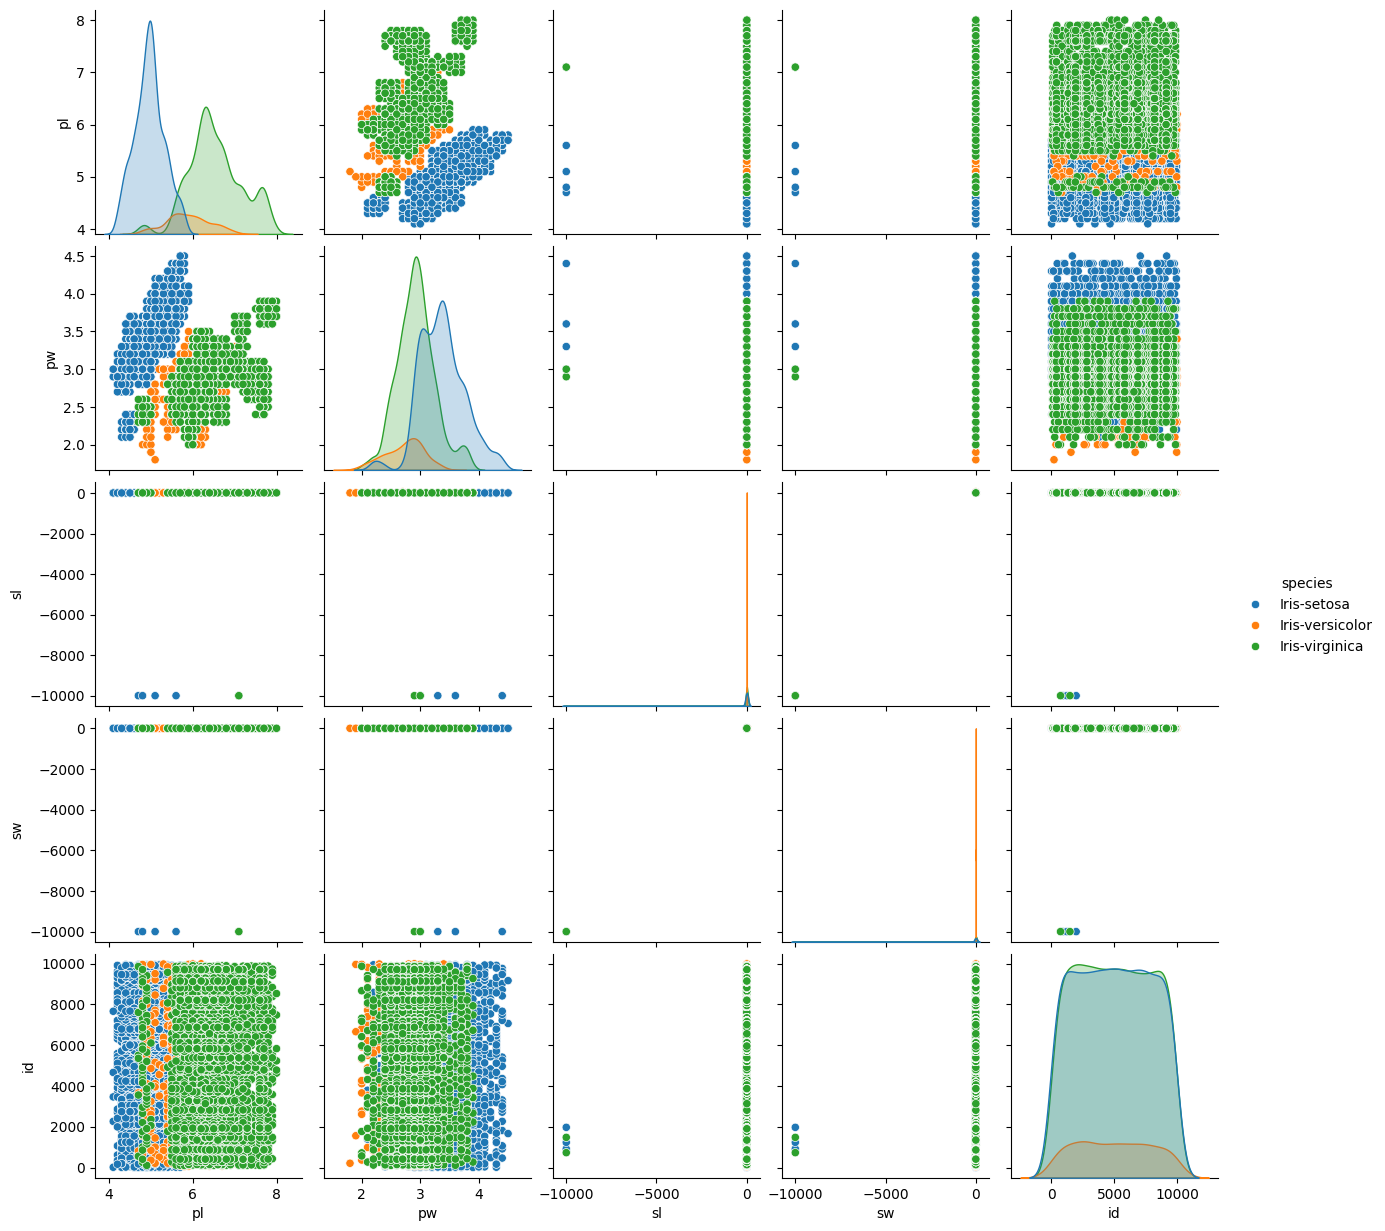

In [35]:
import seaborn
seaborn.pairplot(df, hue='species')

In [36]:
df = df[~(df.isin([-9999]).any(axis=1))]

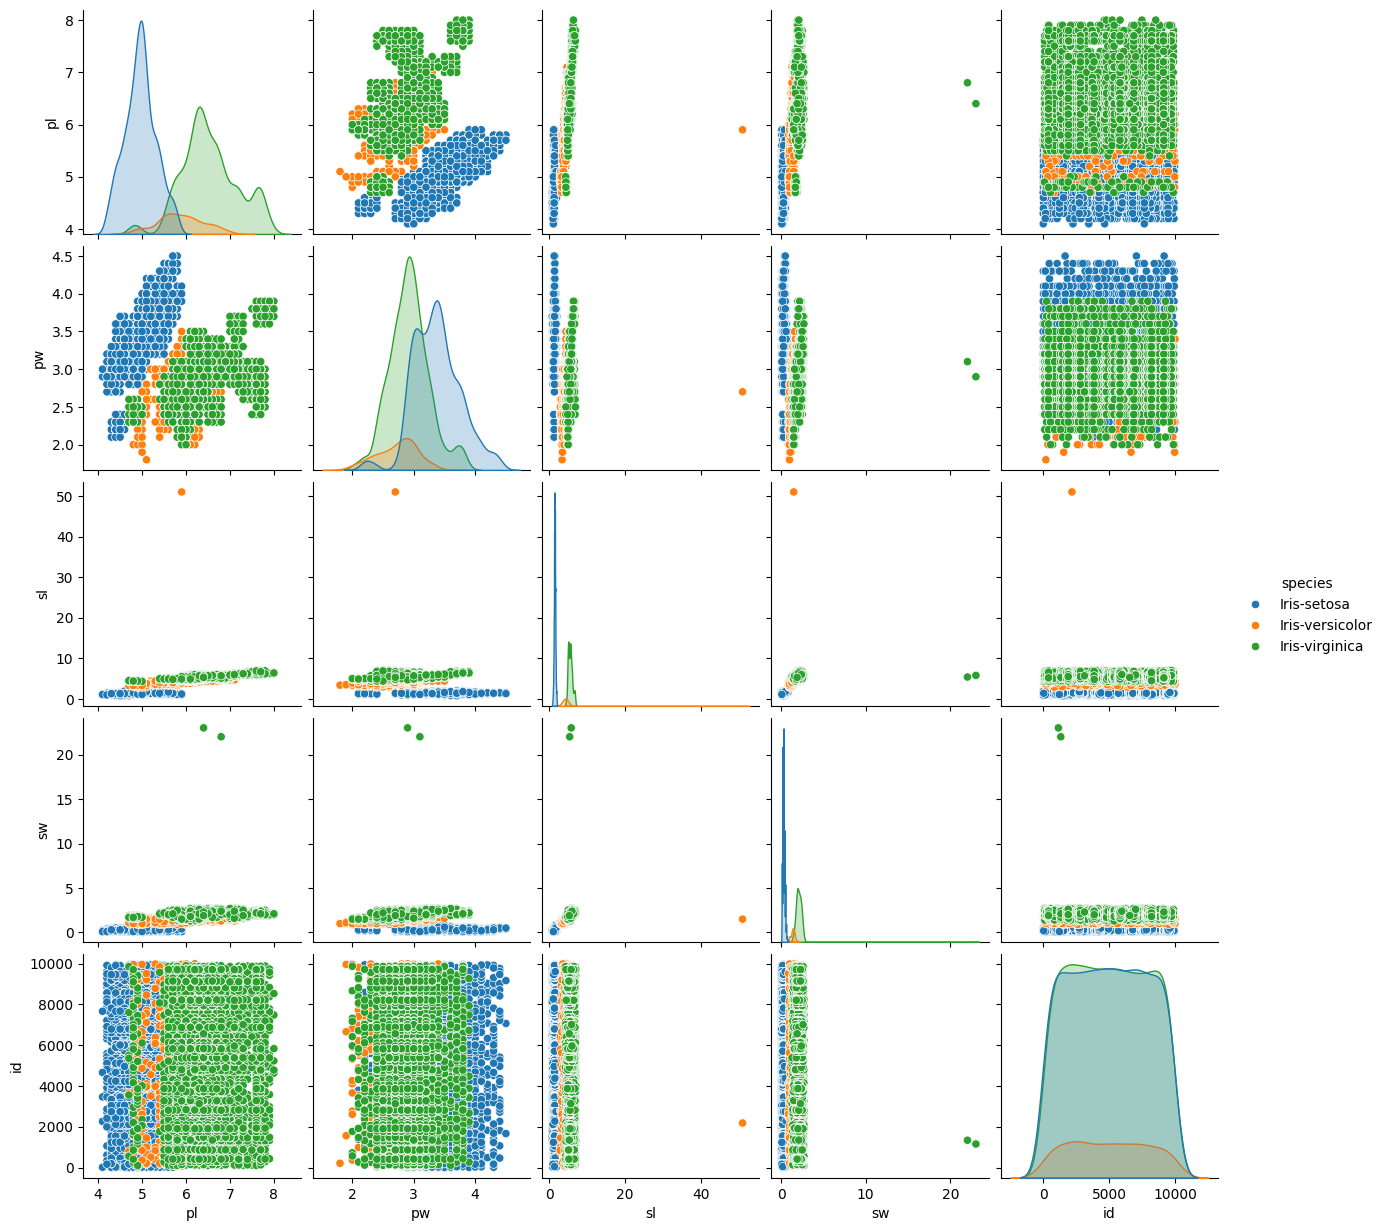

In [37]:
seaborn.pairplot(df, hue='species')

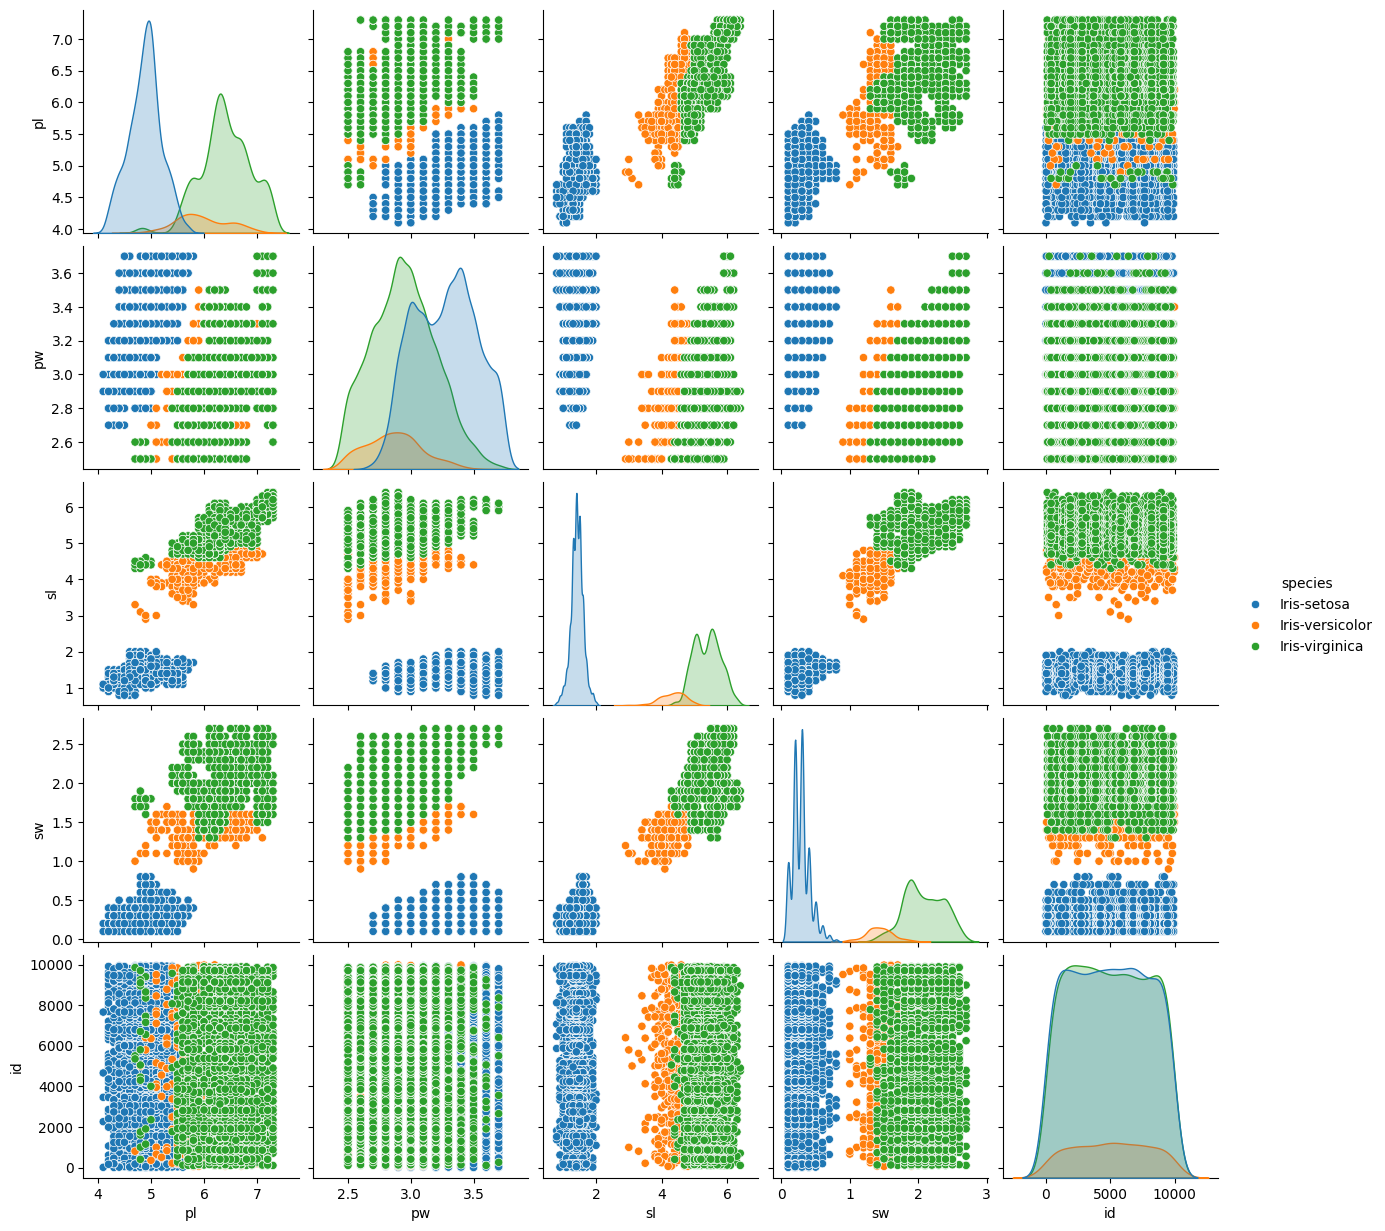

In [44]:
from scipy import stats
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(['id'], axis=1)
threshold = 2
z_score = np.abs(stats.zscore(df_numeric))
outliers = (z_score > threshold).any(axis=1)
df = df[~outliers]
seaborn.pairplot(df, hue='species')

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_numeric)
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)
print(scaled_df)

           pl        pw        sl        sw
0     0.28125  0.785714  0.089286  0.076923
1     0.21875  0.357143  0.089286  0.038462
2     0.21875  0.500000  0.053571  0.076923
3     0.28125  0.857143  0.089286  0.038462
4     0.43750  0.928571  0.160714  0.153846
...       ...       ...       ...       ...
5562  0.93750  0.428571  0.875000  0.576923
5563  1.00000  0.214286  0.964286  0.692308
5564  0.71875  0.214286  0.857143  0.846154
5565  0.93750  0.714286  0.928571  0.884615
5566  0.71875  0.214286  0.803571  0.692308

[5567 rows x 4 columns]


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)
print(scaled_df)

            pl        pw        sl        sw
0    -0.788343  1.206546 -1.094498 -0.993667
1    -1.030051 -0.581354 -1.094498 -1.106447
2    -1.030051  0.014613 -1.197514 -0.993667
3    -0.788343  1.504530 -1.094498 -1.106447
4    -0.184071  1.802513 -0.888467 -0.768107
...        ...       ...       ...       ...
5562  1.749598 -0.283371  1.171848  0.472473
5563  1.991307 -1.177321  1.429387  0.810813
5564  0.903618 -1.177321  1.120340  1.261932
5565  1.749598  0.908563  1.326372  1.374712
5566  0.903618 -1.177321  0.965816  0.810813

[5567 rows x 4 columns]


In [50]:
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(scaled_df)
scaled_df = pd.DataFrame(pc, columns=df_numeric.columns)
print(scaled_df)

            pl        pw        sl        sw
0    -1.971714  0.611443  0.005967 -0.031385
1    -1.570586 -1.134292  0.237256 -0.107153
2    -1.762878 -0.579586  0.070349 -0.184457
3    -2.131949  0.870586  0.021470  0.060502
4    -1.613644  1.424223  0.158922 -0.069171
...        ...       ...       ...       ...
5562  1.923558  0.526053  0.841533  0.229923
5563  2.675153 -0.144220  0.929709  0.101729
5564  2.184275 -0.505728 -0.101655 -0.114432
5565  2.115129  1.749697  0.019263  0.009728
5566  1.848626 -0.575612  0.209948 -0.001531

[5567 rows x 4 columns]


KeyError: 'species'

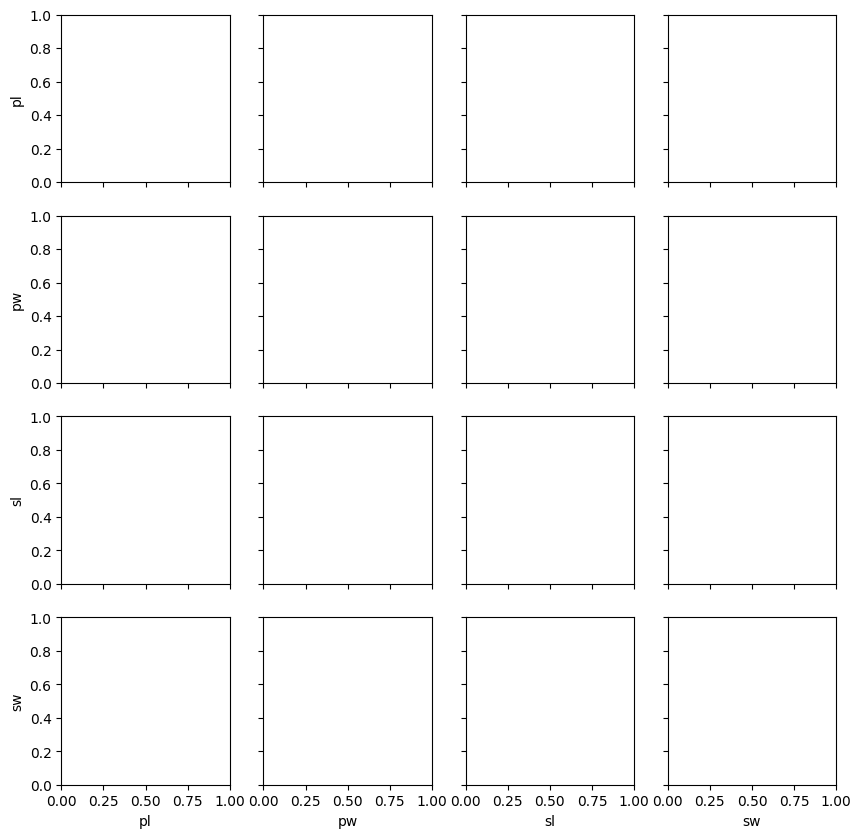

In [51]:
seaborn.pairplot(scaled_df, hue='species')